In [1]:
using DifferentialEquations
using PyPlot
using RMS

In [2]:
phaseDict = readinput("../src/testing/liquid_phase.yml") #load mechanism dictionary

Dict{Any,Any} with 1 entry:
  "phase" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertain…

In [3]:
spcs = phaseDict["phase"]["Species"]; #mechanism dictionaries index:  phaseDict[phasename]["Species" or "Reactions"]
rxns = phaseDict["phase"]["Reactions"];

In [4]:
solv = Solvent("octane",RiedelViscosity(-98.805,3905.5,14.103,-2.5112e-5,2.0));

In [13]:
liq = IdealDiluteSolution(spcs,rxns,solv;name="phase",diffusionlimited=true); #Define the phase (how species thermodynamic and kinetic properties calculated)
initialconds = Dict(["T"=>450.0,"P"=>1e5,"V"=>1.0e-6*1e6,"octane"=>6.154e-3*1e6,"oxygen"=>4.953e-6*1e6]); #Set simulation Initial Temp and Pressure
domain,y0 = ConstantTVDomain(phase=liq,initialconds=initialconds,
    constantspecies=["oxygen"]); #Define the domain (encodes how system thermodynamic properties calculated)

In [14]:
react = Reactor(domain,y0,(0.0,140000.01)); #Create the reactor object

In [15]:
sol = solve(react.ode,CVODE_BDF(),abstol=1e-20,reltol=1e-8); #solve the ode associated with the reactor

In [18]:
bsol = Simulation(sol,domain);

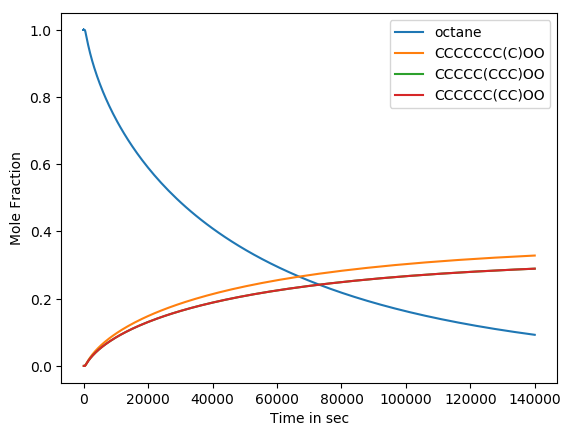

PyObject <matplotlib.text.Text object at 0x16c50c290>

In [19]:
plotmolefractions(bsol,140000.0)

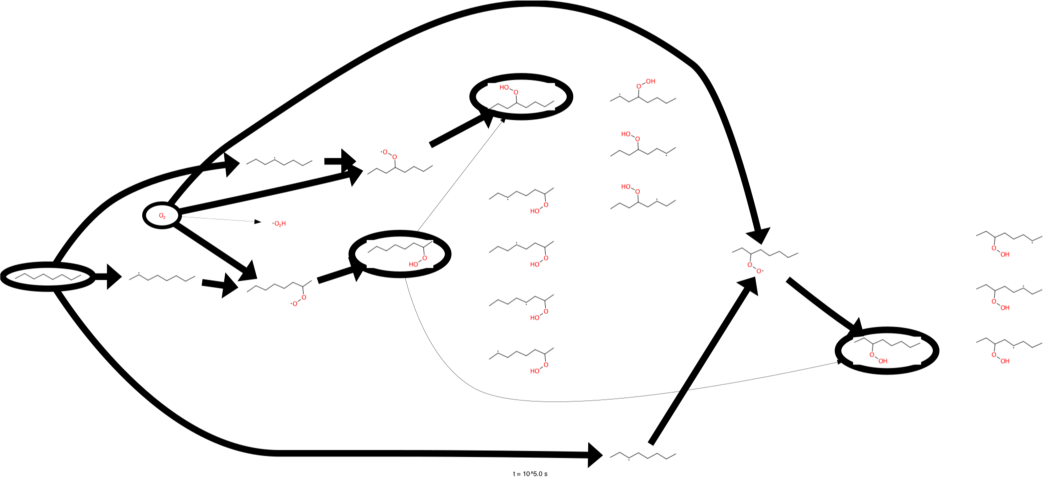

In [20]:
getfluxdiagram(bsol,100000.0)